# Model Project by VEM

## Import
We begin by importing all the necessary packages.

In [1]:
import numpy             as np
import sympy             as sm
import matplotlib.pyplot as plt
import scipy.optimize    as opt
import math
import ipywidgets        as widgets

from sympy.interactive import printing
printing.init_printing(use_latex=True)

print("Packages successfully imported.")

Packages successfully imported.


## Introduction
In this project, we create a framework, which solves variations of the Solow model:

* In part 1, we solve the General Solow Model.
* In part 2, we solve the General Solow Model with Land.
* In part 3, we solve the Solow Model with Human Capital.

# Part 1 - The General Solow Model

In this setup, we have:

- $K_t$ is capital
* $Y_t$ is output
* $L_t$ is labour, which evolves at the rate of *n*
* $A_t$ is technology, which evolves at rate of *g*
* $\delta$ is the rate of depreciation
* And *s* is the savings rate.

The production function is:

$Y_t=K_t^{\alpha}L_t^{1-\alpha}$

And capital accumulates according to:

$K_{t+1}=sY_t+(1-\delta)K_t$

Where the transition equation is:

$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s \tilde{k}_t^{\alpha}+(1-\delta)\tilde{k}_t)$, where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$

Finally, steady state of capital per effective worker:

$\tilde{k}^* = \left(\frac{s}{\delta+n+g+ng}\right)^\frac{1}{1-\alpha}$

## Parameter specification
Below, we firstly define the parameters of the model as sympy symbols. Secondly, we then specify a specific value for each of the parameters. These can be changed per request.

In [2]:
# Defines parameters
g     = sm.symbols('g')        # Growth of TFP
n     = sm.symbols('n')        # Growth of population
alpha = sm.symbols('alpha')    # Capital share
delta = sm.symbols('delta')    # Rate of depreciation
s     = sm.symbols('s')        # Savings rate
k_ss  = sm.symbols('k_ss')     # Capital per effective worker in steady state, ss

# Specifies parameter values
g     = 0.02
n     = 0.02
alpha = 1/3
delta = 0.05
s     = 0.30

print("Parameters successfully set.")

Parameters successfully set.


## Solution and simulation of steady state
The steady state of capital per effective worker is defined as:

$\tilde{k}^* = \left(\frac{s}{\delta+n+g+ng}\right)^\frac{1}{1-\alpha}$

We firstly solve this symbolically below.

In [3]:
# Steady state equation of k
k_ss_symbolic = (s / (delta+n+g+(n+g)))**(1 / (1-alpha))         # Without Sympy

k_ss_sym = sm.Eq(k_ss, (s / (delta+n+g+(n+g)))**(1 / (1-alpha))) # With Sympy
k_ss_sol = sm.solve([k_ss_sym],[k_ss]) # Solves

print(f'Symbolic method: Steady state of capital per effective worker:')
k_ss_sol

Symbolic method: Steady state of capital per effective worker:


We now solve the capital per effective worker through a simple bisection procedure, i.e. solve the function:

$\tilde{k}^* - \left(\frac{s}{\delta+n+g+ng}\right)^\frac{1}{1-\alpha}$ = 0

And then compare it to the symbolic solution above.

In [4]:
# Solves the function, f = 0 

f = lambda k_ss_num: k_ss_num - (s / (delta+n+g+(n+g)))**(1 / (1-alpha))

def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

k_ss = bisection(f,0,100,1e-8)

print('Comparison of solution methods:')
print('')
print(f'Symbolic:  Steady state of capital per effective worker: {k_ss_symbolic:.7f}')
print(f'Numerical: Steady state of capital per effective worker: {k_ss:.7f}')

Comparison of solution methods:

Symbolic:  Steady state of capital per effective worker: 3.5056363
Numerical: Steady state of capital per effective worker: 3.5056363


Here, we see that the solution methods are equivalent. 

Through the creation of an auxiliary equation, *$aux$*, we now simulate the equilibrium path of the economy. This equation is taken from *"Introducing Advanced Macroeconomics - Growth and Business Cycles"* by Birch Sørensen and Whitta Jacobsen (2009).

In [5]:
def aux(x,g,n,s,alpha,delta):
    aux = (1/((1+g)*(1+n)))*((s*(x/((1+g)*(1+n)))**alpha) + ((1-delta)*(x/((1+g)*(1+n)))))
    return aux

print("Simulation ran successfully.")

Simulation ran successfully.


## Plotting the transition diagram
Lastly, we plot the transition of capital per effective worker in a standard transition diagram.

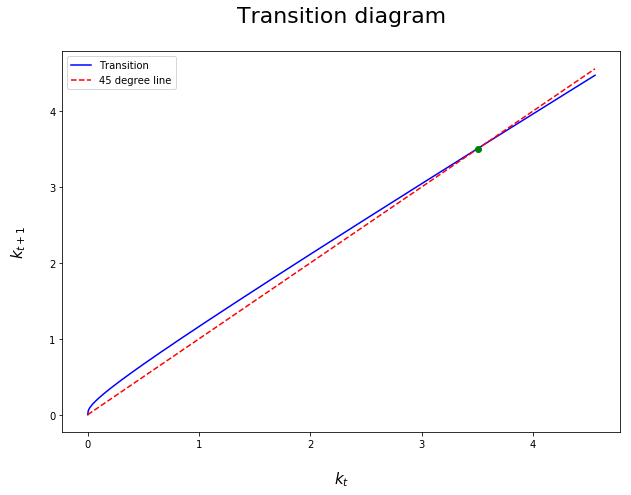

In [6]:
kmin  = 0                             # Minimum x-value of the plot
kmax  = k_ss*1.3                      # Maximum x-value of the plot
k_set = np.linspace(kmin, kmax, 1000) # Boundaries of x- and y-axis

phase = plt.figure(figsize=(10,7))    # Defines the phase diagram
plt.plot(k_set, aux(k_set,g,n,s,alpha,delta), 'b-', # Plots transition line
         k_set, k_set, 'r--',         # 45-degree line
         k_ss, k_ss,   'go')          # Plots point of steady state
plt.xlabel('\n$k_{t}$',   size=15)    # Labels x-axis
plt.ylabel('$k_{t+1}$\n', size=15)    # Labels y-axis
plt.title('Transition diagram\n', size=22) # Sets title and type size
plt.legend(('Transition','45 degree line'),
           loc='upper left')          # Creates legend

plt.show()

Which clearly shows the unique steady state of the model given the parameter values.

Finally, we plot an interactive transition diagram containing a slider for each of the parameters.

In [7]:
kmin  = 0                              # Minimum x-value of the plot
kmax  = k_ss*100                       # Maximum x-value of the plot
k_set = np.linspace(kmin, kmax, 10000) # Boundaries of x- and y-axis

def Transition(g,n,delta,s,alpha):
    
    plt.figure(figsize=(10,7))                           # Defines figure size
    k_ss = (s / (delta+n+g+(n+g)))**(1 / (1-alpha))      # Defines function
    plt.xlim(0, k_ss*1.3)                                # Defines limits
    plt.ylim(0, k_ss*1.3)                                # Defines limits
    plt.locator_params(which='x', tight=True, nbins=10)  # Locates sliders
    plt.xlabel('\n$k_{t}$',   size=15)                   # Labels x-axis
    plt.ylabel('$k_{t+1}$\n', size=15)                   # Labels y-axis
    plt.plot(k_set,aux(k_set,g,n,s,alpha,delta), '-b'),  # Plots
    plt.plot(k_set,k_set, '--r')                         # Plots
    plt.title('Transition diagram\n', size=22)           # Creates title
    plt.legend(('Transition','45 degree line'),
           loc='upper left')                             # Creates legend
    return print(f'The steady state for capital per effective worker is: {k_ss:.2f}')

widgets.interact(Transition,                             # Defines slider
                 s     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.3),
                 n     = widgets.FloatSlider(min=0,max=0.3,step=0.01,value=0.02),
                 alpha = widgets.FloatSlider(min=0,max=2/3,step=0.01,value=1/3),
                 g     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.02),
                 delta = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.05))

interactive(children=(FloatSlider(value=0.02, description='g', max=1.0, step=0.01), FloatSlider(value=0.02, de…

<function __main__.Transition(g, n, delta, s, alpha)>

# Part 2 - The General Solow Model with Land
With the extension of land, we now have the following production function:

$Y_t=K_t^{\alpha}{(A_t L_t)^\beta}X^\kappa$

Where $X$ has no time subscript, since land is in fixed supply.

## Parameter specification
We now define the new parameters.

In [8]:
# Defines new parameters
beta  = sm.symbols('beta')  # Labour share
kappa = sm.symbols('kappa') # Land share
z_ss  = sm.symbols('z_ss')

# Specifies parameter values
beta  = 1/3
kappa = 1-alpha-beta

print("Parameters successfully set.")

Parameters successfully set.


## Solution and simulation of steady state

Instead of solving this model in terms of capital per effective worker, we solve it in terms of capital-output ratio, $z_t$. Here, the steady state of $z^*$ is given by:

$z^* = \left(\frac{s}{[(1+n)(1+g)]^\frac{\beta}{\beta+\kappa}-(1-\delta)}\right) > 0$

Again, we do this symbolic first.

In [9]:
# Steady state equation of z
z_ss_symbolic = (s / (((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta)))       # Without Sympy

z_ss_sm  = sm.Eq(z_ss, s / (((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta))) # With Sympy
z_ss_sol = sm.solve([z_ss_sm],[z_ss]) # Solves

print(f'Symbolic method: Steady state of capital-output ratio:')
z_ss_sol

Symbolic method: Steady state of capital-output ratio:


And now with bisection, where we solve:

$z^* - \left(\frac{s}{[(1+n)(1+g)]^\frac{\beta}{\beta+\kappa}-(1-\delta)}\right) = 0$

In [10]:
# Solves the function, f = 0 

f = lambda z_ss: z_ss - (s / (((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta))) 

def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

z_ss = bisection(f,0,100,1e-8)

print('Comparison of solution methods:')
print('')
print(f'Symbolic:  Steady state of capital-output ratio: {z_ss_symbolic:.7f}')
print(f'Numerical: Steady state of capital-output ratio: {z_ss:.7f}')

Comparison of solution methods:

Symbolic:  Steady state of capital-output ratio: 4.2857143
Numerical: Steady state of capital-output ratio: 4.2857143


Again, we see that the solution methods are equivalent.

Through the creation of an auxiliary equation, *$aux_z$*, we now simulate the equilibrium path of the economy. Again, this is with reference to Birch Sørensen and Whitta Jacobsen (2009).

In [11]:
def aux_z(z,g,n,s,alpha,delta,beta):
    aux_z = (1/((1+g)*(1+n)))**beta*(((s+(1-delta)*z)**(1-alpha))*z**alpha)
    return aux_z
    
print("Simulation ran successfully.")

Simulation ran successfully.


## Plotting the transition diagram
Lastly, we plot the transition of the capital-output ratio in a standard transition diagram.

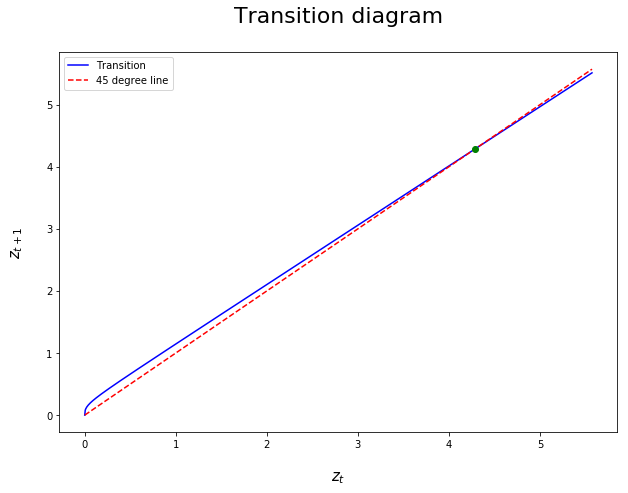

In [12]:
zmin  = 0                             # Minimum x-value of the plot
zmax  = z_ss*1.3                      # Maximum x-value of the plot
z_set = np.linspace(zmin, zmax, 1000) # Boundaries of x- and y-axis

phase = plt.figure(figsize=(10,7))    # Defines the phase diagram
plt.plot(z_set, aux_z(z_set,g,n,s,alpha,delta,beta), 'b-', # Plots transition line
         z_set, z_set,     'r--',     # 45-degree line
         z_ss, z_ss,       'go')      # Plots point of steady state
plt.xlabel('\n$z_{t}$',   size=15)    # Labels x-axis
plt.ylabel('$z_{t+1}$\n', size=15)    # Labels y-axis
plt.title('Transition diagram\n', size=22) # Sets title and type size
plt.legend(('Transition','45 degree line'),
           loc='upper left')          # Creates legend

plt.show()

Which clearly shows the unique steady state of the model given the parameter values.

Finally, we plot an interactive phase diagram containing a slider for each of the parameters.

In [13]:
zmin  = 0                              # Minimum x-value of the plot
zmax  = z_ss*100                       # Maximum x-value of the plot
z_set = np.linspace(zmin, zmax, 10000) # Boundaries of x- and y-axis

def Transition(g,n,delta,s,alpha,beta):
    plt.figure(figsize=(10,7))                                  # Defines figure size
    z_ss = (s/(((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta))) # Defines function
    plt.xlim(0, z_ss*1.3)                                       # Defines limits
    plt.ylim(0, z_ss*1.3)                                       # Defines limits
    plt.locator_params(which='x', tight=True, nbins=10)         # Locates sliders
    plt.xlabel('\n$z_{t}$',   size=15)                          # Labels x-axis
    plt.ylabel('$z_{t+1}$\n', size=15)                          # Labels y-axis
    plt.plot(z_set,aux_z(z_set,g,n,s,alpha,delta,beta), '-b')   # Plots
    plt.plot(z_set,z_set, '--r')                                # Plots 45-degree line
    plt.title('Transition diagram\n', size=22)                  # Creates title
    plt.legend(('Transition','45 degree line'),
           loc='upper left')                                    # Creates legend
    return print(f'The steady state for capital-output ratio is: {z_ss:.2f}')

widgets.interact(Transition,                                    # Defines slider
                 beta  = widgets.FloatSlider(min=0,max=2/3,step=0.01,value=1/3),
                 alpha = widgets.FloatSlider(min=0,max=2/3,step=0.01,value=1/3),
                 s     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.3),
                 n     = widgets.FloatSlider(min=0,max=0.3,step=0.01,value=0.02),
                 g     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.02),
                 delta = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.05))

interactive(children=(FloatSlider(value=0.02, description='g', max=1.0, step=0.01), FloatSlider(value=0.02, de…

<function __main__.Transition(g, n, delta, s, alpha, beta)>

# Part 3 - The Solow Model with Human Capital
With the extension of human capital, we now have the following production function:

$Y_t=K_t^{\alpha}H_t^{\phi}{(A_t L_t)}^{1-\alpha-\phi}$

## Parameter specification
We now define the new parameters.

In [14]:
# Defines parameters
phi   = sm.symbols('phi') 
s_k   = sm.symbols('s_k')
s_h   = sm.symbols('s_h')
k1_ss = sm.symbols('k1_ss')
h_ss  = sm.symbols('h_ss')

# Specifies parameter values
phi = 1/3
s_k = 0.2
s_h = 0.15

print("Parameters successfully set.")

Parameters successfully set.


## Solution and simulation of steady state

This time, we solve the model in terms of capital and human capital per effective worker, $k_t$ and $h_t$, respectively. These are given by:

$\tilde{k}^* = \left(\frac{s_k^{1-\phi} s_h^\phi}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}}$

$\tilde{h}^* = \left(\frac{s_k^{\alpha} s_h^{1-\alpha}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}}$

Again, we do this symbolic first.

In [15]:
# Steady state equation of capital
k1_ss_symbolic = ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))           # Without Sumpy

k1_ss_sm = sm.Eq(k1_ss, ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)))   # With Sumpy
k1_ss_sol = sm.solve([k1_ss_sm],[k1_ss]) # Solves


# Steady state equation of human capital
h_ss_symbolic = ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))        # Without Sumpy

h_ss_sm = sm.Eq(h_ss, ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))) # With Sumpy
h_ss_sol = sm.solve([h_ss_sm],[h_ss]) # Solves

print('Symbolic method: Steady state of capital and human capital:')
k1_ss_sol, h_ss_sol

Symbolic method: Steady state of capital and human capital:


And now with bisection, where we solve:

$\tilde{k}^* - \left(\frac{s_k^{1-\phi} s_h^\phi}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}} = 0$

And:

$\tilde{h}^* - \left(\frac{s_k^{\alpha} s_h^{1-\alpha}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}} = 0$

Respectively.

In [16]:
f = lambda k_ss: k_ss - ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)) 
h = lambda h_ss: h_ss - ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)) 

def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

k1_ss = bisection(f,0,100,1e-8)

print('Comparison of solution methods:')
print('')
print(f'Symbolic:  Steady state of capital per effective worker: {k1_ss_symbolic:.7f}')
print(f'Numerical: Steady state of capital per effective worker: {k1_ss:.7f}')

def bisection(h,a,b,tol=1e-8):

    # Test inputs
    if h(a) * h(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        h_m_n = h(m_n)
        
        # Step 3: Determine sub-interval
        if abs(h_m_n) < tol:
            return m_n
        elif h(a_n)*h_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif h(b_n)*h_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

h_ss = bisection(h,0,100,1e-8)

print('')
print(f'Symbolic:  Steady state of capital per effective worker: {h_ss_symbolic:.7f}')
print(f'Numerical: Steady state of capital per effective worker: {h_ss:.7f}')

Comparison of solution methods:

Symbolic:  Steady state of capital per effective worker: 8.1216816
Numerical: Steady state of capital per effective worker: 8.1216816

Symbolic:  Steady state of capital per effective worker: 6.0912612
Numerical: Steady state of capital per effective worker: 6.0912612


Again, we see that the solution methods are equivalent.

Through the creation of an auxiliary equation, *$aux_k$* and *$aux_h$*, respectively, we now simulate the equilibrium path of the economy. This is - again - with reference to Birch Sørensen and Whitta Jacobsen (2009).

In [17]:
def aux_k(x,g,n,s_k,s_h,alpha,delta,phi):
    aux_k = ((n+g+delta+(n*g))/s_k)**(1/phi)*x**((1-alpha)/phi)
    return aux_k

def aux_h(x,g,n,s_k,s_h,alpha,delta,phi):
    aux_h = (s_h/(n+g+delta+(n*g)))**(1/(1-phi))*x**(alpha/(1-phi))
    return aux_h

## Plotting the transition diagram
Lastly, we plot the transition of capital and human capital in a standard transition diagram.

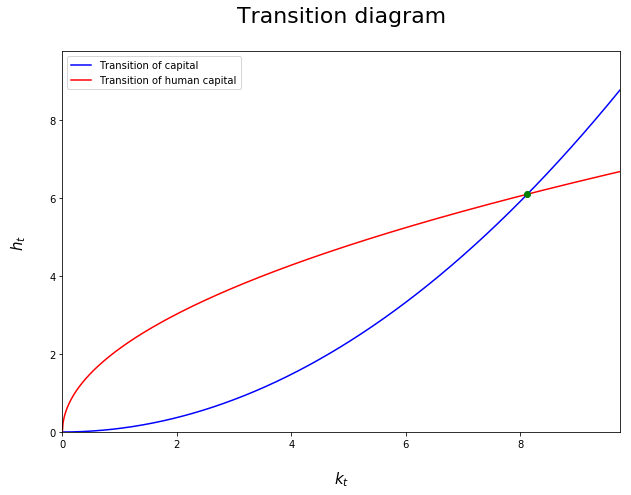

In [18]:
hmin  = 0                                  # Minimum x-value of the plot
hmax  = max(h_ss*1.2, k1_ss*1.2)           # Maximum x-value of the plot
h_set = np.linspace(hmin, hmax, 1000)      # Boundaries of x- and y-axis

k1min  = 0                                 # Minimum x-value of the plot
k1max  = max(h_ss*1.2, k1_ss*1.2)          # Maximum x-value of the plot
k1_set = np.linspace(k1min, k1max, 1000)   # Boundaries of x- and y-axis

phase = plt.figure(figsize=(10,7))         # Defines figure size

plt.xlim(0, k1max)                         # Define limits
plt.ylim(0, hmax)                          # Define limits
plt.plot(k1_set, aux_k(k1_set,g,n,s_k,s_h,alpha,delta,phi), 'b-', # Plots transition line
         h_set, aux_h(k1_set,g,n,s_k,s_h,alpha,delta,phi), 'r-',
        k1_ss_symbolic, h_ss_symbolic, 'go')                      # Plots point of steady state
plt.xlabel('\n$k_{t}$',   size=15)         # Labels x-axis
plt.ylabel('$h_{t}$\n', size=15)           # Labels y-axis
plt.title('Transition diagram\n', size=22) # Sets title and type size
plt.legend(('Transition of capital','Transition of human capital'),
           loc='upper left')               # Creates legend

plt.show()

Which clearly shows the unique steady state of the model given the parameter values.

## Conclusion
In this data project, we created a framework, which solves three variants of the Solow Model and plots the transition to each of the unique steady states. For each model, one can choose any given set of parameters for the model to be solved. In part 1 and 2 (the General Solow Model and the General Solow Model with Land), every parameter of the models can be altered interactively using the sliders and the immediate results hereof can be seen.